In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier




In [2]:
#convert the dataset to pandas dataframe
df=pd.read_csv('/content/teleCust1000t.csv')

In [3]:
#print first 5 rows
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
#no of columns ad rows
df.shape

(1000, 12)

In [5]:
#last 5 rows of the datatset
df.tail()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [6]:
#analysis the statistical of the dataset
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [7]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


In [8]:
x=df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values
x[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [9]:
y=df['custcat'].values
y[0:5]



array([1, 4, 3, 1, 3])

In [10]:
#normalizing the data
scaler=StandardScaler()
x=scaler.fit_transform(x)
x[0:5]


array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [11]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
print(x.shape,x_train.shape,x_test.shape)

(1000, 11) (800, 11) (200, 11)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
k=5
#train the model
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier()

In [14]:
#prediction
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 1, 3])

In [15]:
#accuracy of the model
from sklearn import metrics

#training data accuracy
traindata_accuracy=metrics.accuracy_score(y_train,neigh.predict(x_train))



#test data accuracy
testdata_accuracy=metrics.accuracy_score(neigh.predict(x_test),yhat)


print("Train set Accuracy: ", traindata_accuracy)
print("Test set Accuracy: ", testdata_accuracy)

Train set Accuracy:  0.565
Test set Accuracy:  1.0


k=3

In [16]:
k=3
#train the model
neigh=KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [17]:
#prediction
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 4, 3])

In [18]:
#accuracy of the model
from sklearn import metrics

#training data accuracy
traindata_accuracy=metrics.accuracy_score(y_train,neigh.predict(x_train))



#test data accuracy
testdata_accuracy=metrics.accuracy_score(neigh.predict(x_test),yhat)


print("Train set Accuracy: ", traindata_accuracy)
print("Test set Accuracy: ", testdata_accuracy)

Train set Accuracy:  0.58
Test set Accuracy:  1.0


k=1

In [19]:
k=1
#train the model
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

In [20]:
#prediction
yhat=neigh.predict(x_test)
yhat[0:5]

array([3, 3, 3, 4, 3])

In [21]:
#accuracy of the model
from sklearn import metrics

#training data accuracy
traindata_accuracy=metrics.accuracy_score(y_train,neigh.predict(x_train))



#test data accuracy
testdata_accuracy=metrics.accuracy_score(neigh.predict(x_test),yhat)


print("Train set Accuracy: ", traindata_accuracy)
print("Test set Accuracy: ", testdata_accuracy)

Train set Accuracy:  1.0
Test set Accuracy:  1.0


k=9

In [22]:
k=9
#train the model
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [23]:
#prediction
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 2, 1, 3])

In [24]:
#accuracy of the model
from sklearn import metrics

#training data accuracy
traindata_accuracy=metrics.accuracy_score(y_train,neigh.predict(x_train))



#test data accuracy
testdata_accuracy=metrics.accuracy_score(neigh.predict(x_test),yhat)


print("Train set Accuracy: ", traindata_accuracy)
print("Test set Accuracy: ", testdata_accuracy)

Train set Accuracy:  0.48625
Test set Accuracy:  1.0


k=11

In [25]:
k=11
#train the model
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=11)

In [26]:
#prediction
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 1, 3])

In [27]:
#accuracy of the model
from sklearn import metrics

#training data accuracy
traindata_accuracy=metrics.accuracy_score(y_train,neigh.predict(x_train))



#test data accuracy
testdata_accuracy=metrics.accuracy_score(neigh.predict(x_test),yhat)


print("Train set Accuracy: ", traindata_accuracy)
print("Test set Accuracy: ", testdata_accuracy)

Train set Accuracy:  0.4975
Test set Accuracy:  1.0


k=7

In [28]:
k=7
#train the model
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [29]:
#prediction
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 2, 1, 3])

In [30]:
#accuracy of the model
from sklearn import metrics

#training data accuracy
traindata_accuracy=metrics.accuracy_score(y_train,neigh.predict(x_train))



#test data accuracy
testdata_accuracy=metrics.accuracy_score(neigh.predict(x_test),yhat)


print("Train set Accuracy: ", traindata_accuracy)
print("Test set Accuracy: ", testdata_accuracy)

Train set Accuracy:  0.52625
Test set Accuracy:  1.0


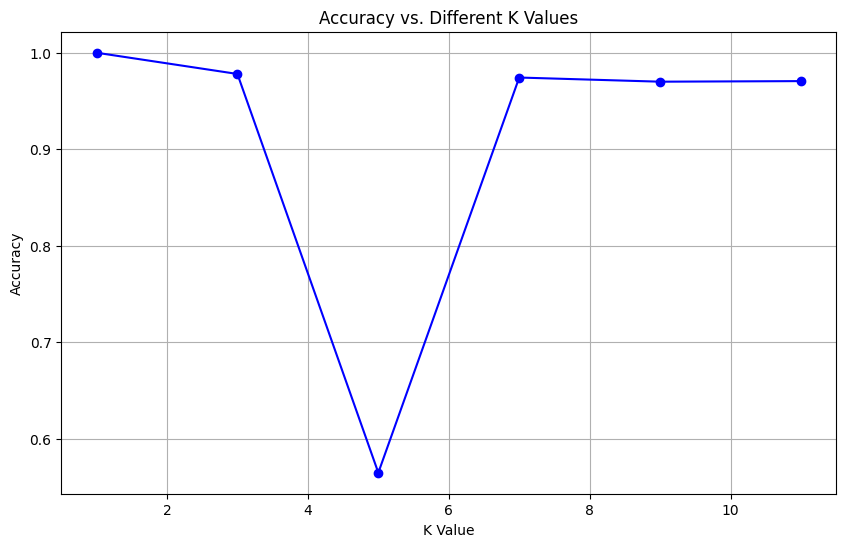

In [31]:
#visual representation
import matplotlib.pyplot as plt
import seaborn as sns
# Example data for accuracy and corresponding k values
k_values = [1, 3, 5, 7, 9, 11]  # Replace with your actual k values
accuracy = [1, 0.978, 0.565, 0.9743, 0.970, 0.9706]  # Replace with your actual accuracy values

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Different K Values')
plt.grid(True)
plt.show()

SVM

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [33]:
#convert the dataset to pandas dataframe
df=pd.read_csv('/content/cell_samples.csv')

In [34]:
#read first 5 rows of the dataset
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
#no of rows and columns
df.shape

(699, 11)

In [36]:
df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,object
BlandChrom,int64
NormNucl,int64
Mit,int64


In [37]:
#convert the datatype
df=df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

<ipython-input-37-2dbfcc3f4c0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BareNuc'] = df['BareNuc'].astype('int')


,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [38]:
df['Class'].value_counts()

,count
Class,
2,444
4,239


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


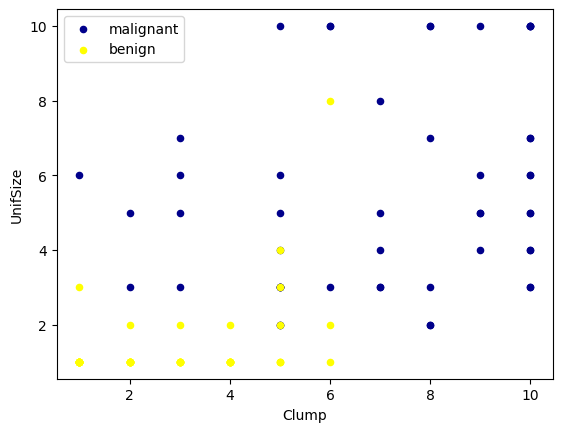

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
#draw the scatter diagram


ax=df[df['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='DarkBlue',label='malignant')
df[df['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',label='benign',ax=ax)
plt.show()

In [41]:
#data preprocessing
x=df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']].values
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [42]:
y=df['Class'].values
y[0:5]


array([2, 2, 2, 2, 2])

In [43]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
x[0:5]



array([[ 0.19790469, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299,  0.75803177,  1.69516613,
         1.77286724, -0.18182716, -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, -0.63936553, -0.5556085 ,
        -0.4242175 , -0.18182716, -0.61292736, -0.34839971],
       [ 0.55267873,  1.58320366,  1.6021918 , -0.63936553, -0.10545357,
         0.12505369, -0.18182716,  1.3540079 , -0.34839971],
       [-0.15686934, -0.70221201, -0.74177362,  0.05933312, -0.5556085 ,
        -0.69885309, -0.18182716, -0.61292736, -0.34839971]])

In [44]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print(x.shape,x_train.shape,x_test.shape)

(683, 9) (546, 9) (137, 9)


In [45]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [46]:
#training the test data

from sklearn import metrics
from sklearn.metrics import accuracy_score
train_prediction=model.predict(x_train)
accuracy_of_the_test_data=accuracy_score(y_train,train_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)



Accuracy score of the training data: 0.9761904761904762


In [47]:
#test data accuracy
test_prediction=model.predict(x_test)
accuracy_of_the_test_data=accuracy_score(y_test,test_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.9635036496350365


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,test_prediction)

array([[85,  5],
       [ 0, 47]])

task 02

In [49]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
#training the test data

from sklearn import metrics
from sklearn.metrics import accuracy_score
train_prediction=model.predict(x_train)
accuracy_of_the_test_data=accuracy_score(y_train,train_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.9761904761904762


In [51]:
#test data accuracy
test_prediction=model.predict(x_test)
accuracy_of_the_test_data=accuracy_score(y_test,test_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.9635036496350365


In [52]:
from sklearn.svm import SVC
model=SVC(kernel='poly')
model.fit(x_train,y_train)

SVC(kernel='poly')

In [53]:
#training the test data

from sklearn import metrics
from sklearn.metrics import accuracy_score
train_prediction=model.predict(x_train)
accuracy_of_the_test_data=accuracy_score(y_train,train_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.967032967032967


In [54]:
#test data accuracy
test_prediction=model.predict(x_test)
accuracy_of_the_test_data=accuracy_score(y_test,test_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.9781021897810219


In [55]:
from sklearn.svm import SVC
model=SVC(kernel='sigmoid')
model.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [56]:
#training the test data

from sklearn import metrics
from sklearn.metrics import accuracy_score
train_prediction=model.predict(x_train)
accuracy_of_the_test_data=accuracy_score(y_train,train_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.9633699633699634


In [57]:
#test data accuracy
test_prediction=model.predict(x_test)
accuracy_of_the_test_data=accuracy_score(y_test,test_prediction)
print('Accuracy score of the training data:',accuracy_of_the_test_data)

Accuracy score of the training data: 0.9635036496350365


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# Load sample dataset (Iris dataset for demonstration; replace with your data)
data = load_iris()
X, y = data.data, data.target

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for RBF kernel
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Kernel types
}

# Create an SVM classifier
svm = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Perform the grid search
grid_search.fit(X, y)

# Output the best parameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Detailed report of performance on test data
print("Classification Report:")
y_pred = grid_search.best_estimator_.predict(X)
print(classification_report(y, y_pred))



Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1